In [63]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

combined_features = pd.read_csv('../data/Shop_Features.csv')

In [64]:
combined_features.head()

,shop_id,total_sales,total_quantity_sold,mean_item_price,total_bills,total_transactions,total_items,total_customers,weekday_transactions,weekend_transactions,shop_area_sq_ft
0,SHOP001,628055,2996,196.243448,1351,1717,35,982,1108,609,580
1,SHOP002,1509890,7037,194.808696,3187,4025,35,2298,2646,1379,637
2,SHOP003,1152090,5601,188.318777,2558,3206,35,1874,2133,1073,810
3,SHOP004,1120455,5455,189.714332,2370,3063,35,1600,1954,1109,516
4,SHOP005,1229570,6031,191.287073,2779,3574,35,1940,2259,1315,617


In [65]:
combined_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124 entries, 0 to 123
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   shop_id               124 non-null    object 
 1   total_sales           124 non-null    int64  
 2   total_quantity_sold   124 non-null    int64  
 3   mean_item_price       124 non-null    float64
 4   total_bills           124 non-null    int64  
 5   total_transactions    124 non-null    int64  
 6   total_items           124 non-null    int64  
 7   total_customers       124 non-null    int64  
 8   weekday_transactions  124 non-null    int64  
 9   weekend_transactions  124 non-null    int64  
 10  shop_area_sq_ft       124 non-null    int64  
dtypes: float64(1), int64(9), object(1)
memory usage: 10.8+ KB


In [66]:
combined_features.describe()

,total_sales,total_quantity_sold,mean_item_price,total_bills,total_transactions,total_items,total_customers,weekday_transactions,weekend_transactions,shop_area_sq_ft
count,1.240000e+02,124.000000,124.000000,124.000000,124.000000,124.00000,124.000000,124.000000,124.000000,124.000000
mean,1.202328e+06,5812.685484,190.003487,2571.766129,3301.693548,34.66129,1807.120968,2091.056452,1210.637097,619.991935
std,3.726580e+05,1744.105536,9.356216,750.106129,980.225643,1.26161,518.614251,611.260956,382.025418,126.770165
min,8.083500e+04,415.000000,141.021843,186.000000,247.000000,31.00000,176.000000,114.000000,133.000000,298.000000
25%,9.681725e+05,4789.250000,184.808269,2154.750000,2743.750000,35.00000,1464.000000,1715.250000,964.750000,553.250000
50%,1.198388e+06,5708.000000,190.510969,2530.500000,3243.500000,35.00000,1785.500000,2122.000000,1181.000000,617.000000
75%,1.388020e+06,6772.250000,195.615119,3013.000000,3888.250000,35.00000,2163.250000,2443.750000,1406.000000,676.000000
max,2.206555e+06,9876.000000,209.770182,4446.000000,5672.000000,36.00000,2976.000000,3492.000000,2180.000000,1077.000000


In [67]:
feature_cols = [ col for col in combined_features.columns if col != "shop_id" ]
print("No of features to compare:", len(feature_cols))

No of features to compare: 10


In [68]:
combined_features[feature_cols]

,total_sales,total_quantity_sold,mean_item_price,total_bills,total_transactions,total_items,total_customers,weekday_transactions,weekend_transactions,shop_area_sq_ft
0,628055,2996,196.243448,1351,1717,35,982,1108,609,580
1,1509890,7037,194.808696,3187,4025,35,2298,2646,1379,637
2,1152090,5601,188.318777,2558,3206,35,1874,2133,1073,810
3,1120455,5455,189.714332,2370,3063,35,1600,1954,1109,516
4,1229570,6031,191.287073,2779,3574,35,1940,2259,1315,617
...,...,...,...,...,...,...,...,...,...,...
119,612310,3013,189.090136,1401,1764,35,1019,1115,649,735
120,1543385,7138,196.481149,2920,3899,35,2069,2434,1465,606
121,707320,3142,192.141919,1101,1522,36,760,963,559,1028
122,1095985,5109,190.116406,2251,2749,31,1562,1834,915,328


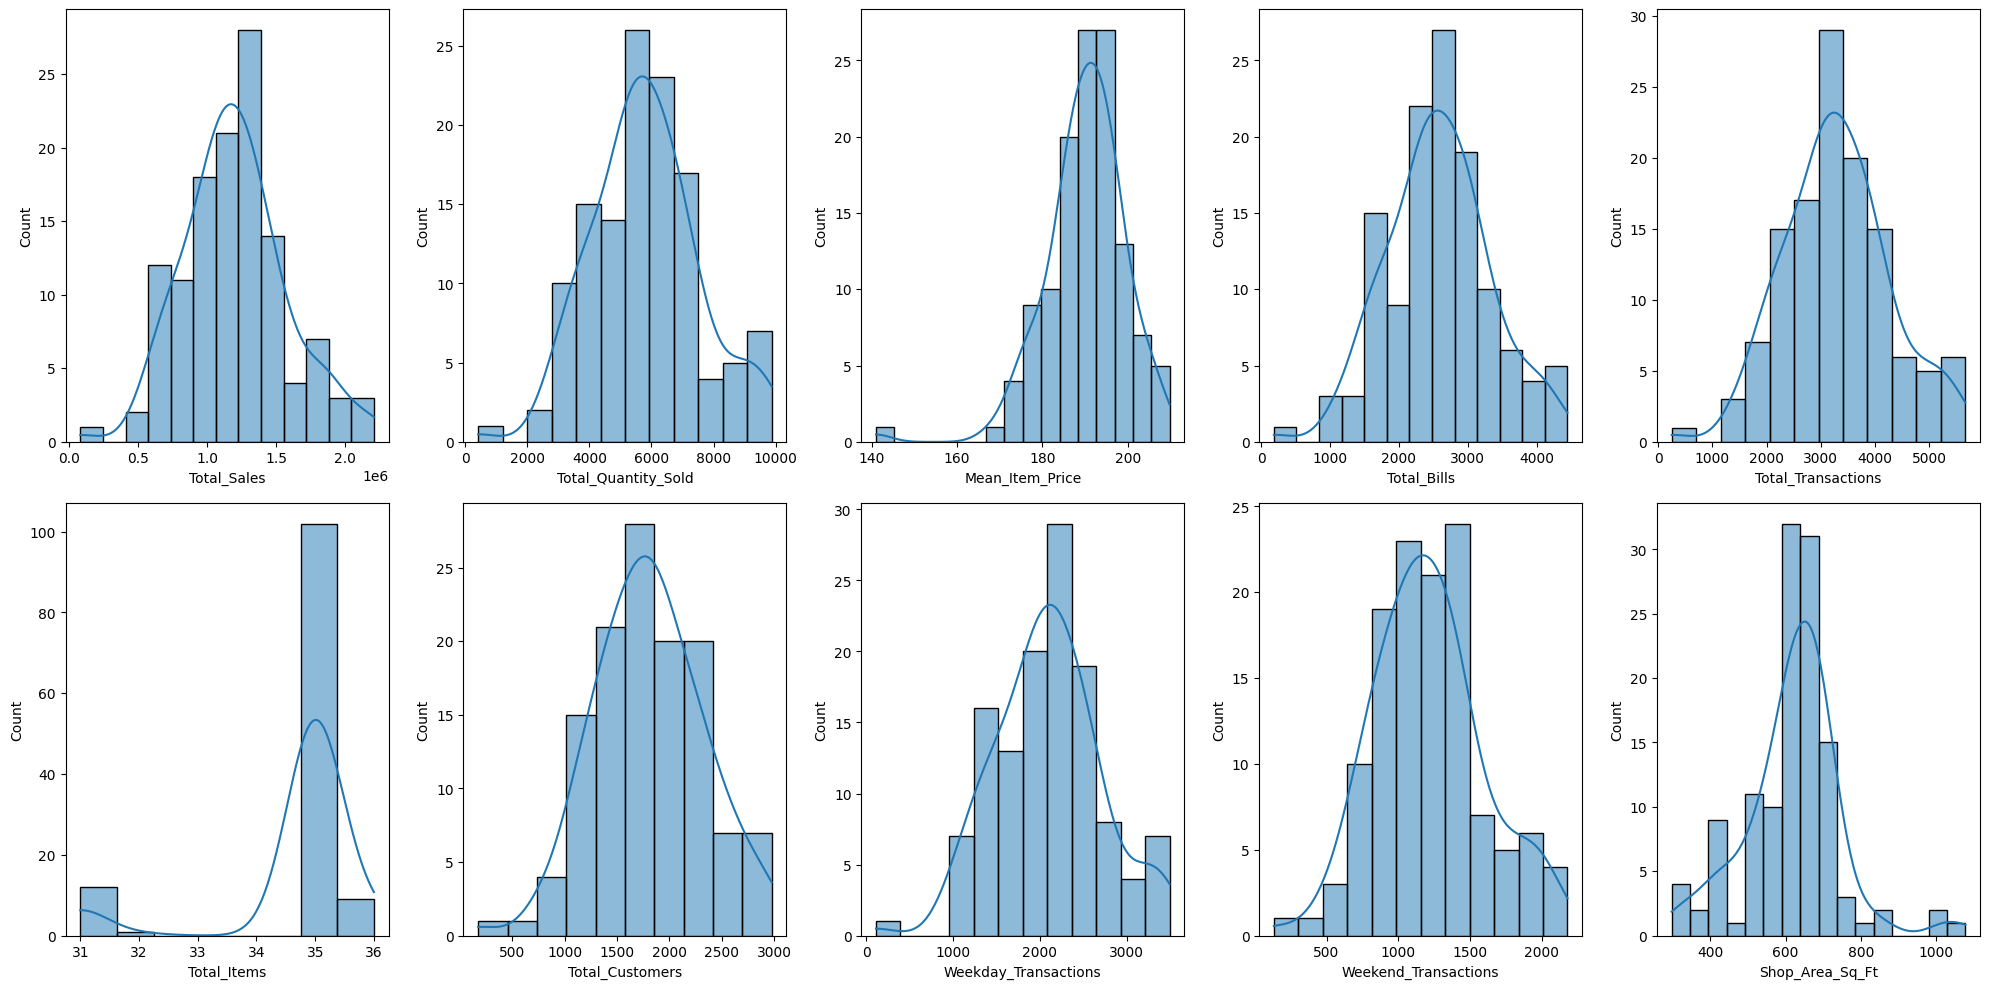

In [69]:
# Create hist plots for each features
fig, axes = plt.subplots(2, 5, figsize=(20, 10))

for i, feature_x in enumerate(feature_cols):
    ix = i//5
    iy = i%5
    sns.histplot(ax=axes[ix, iy], x=combined_features[feature_x], kde=True)
    axes[ix, iy].set_xlabel(feature_x.title())

plt.tight_layout()
plt.show()

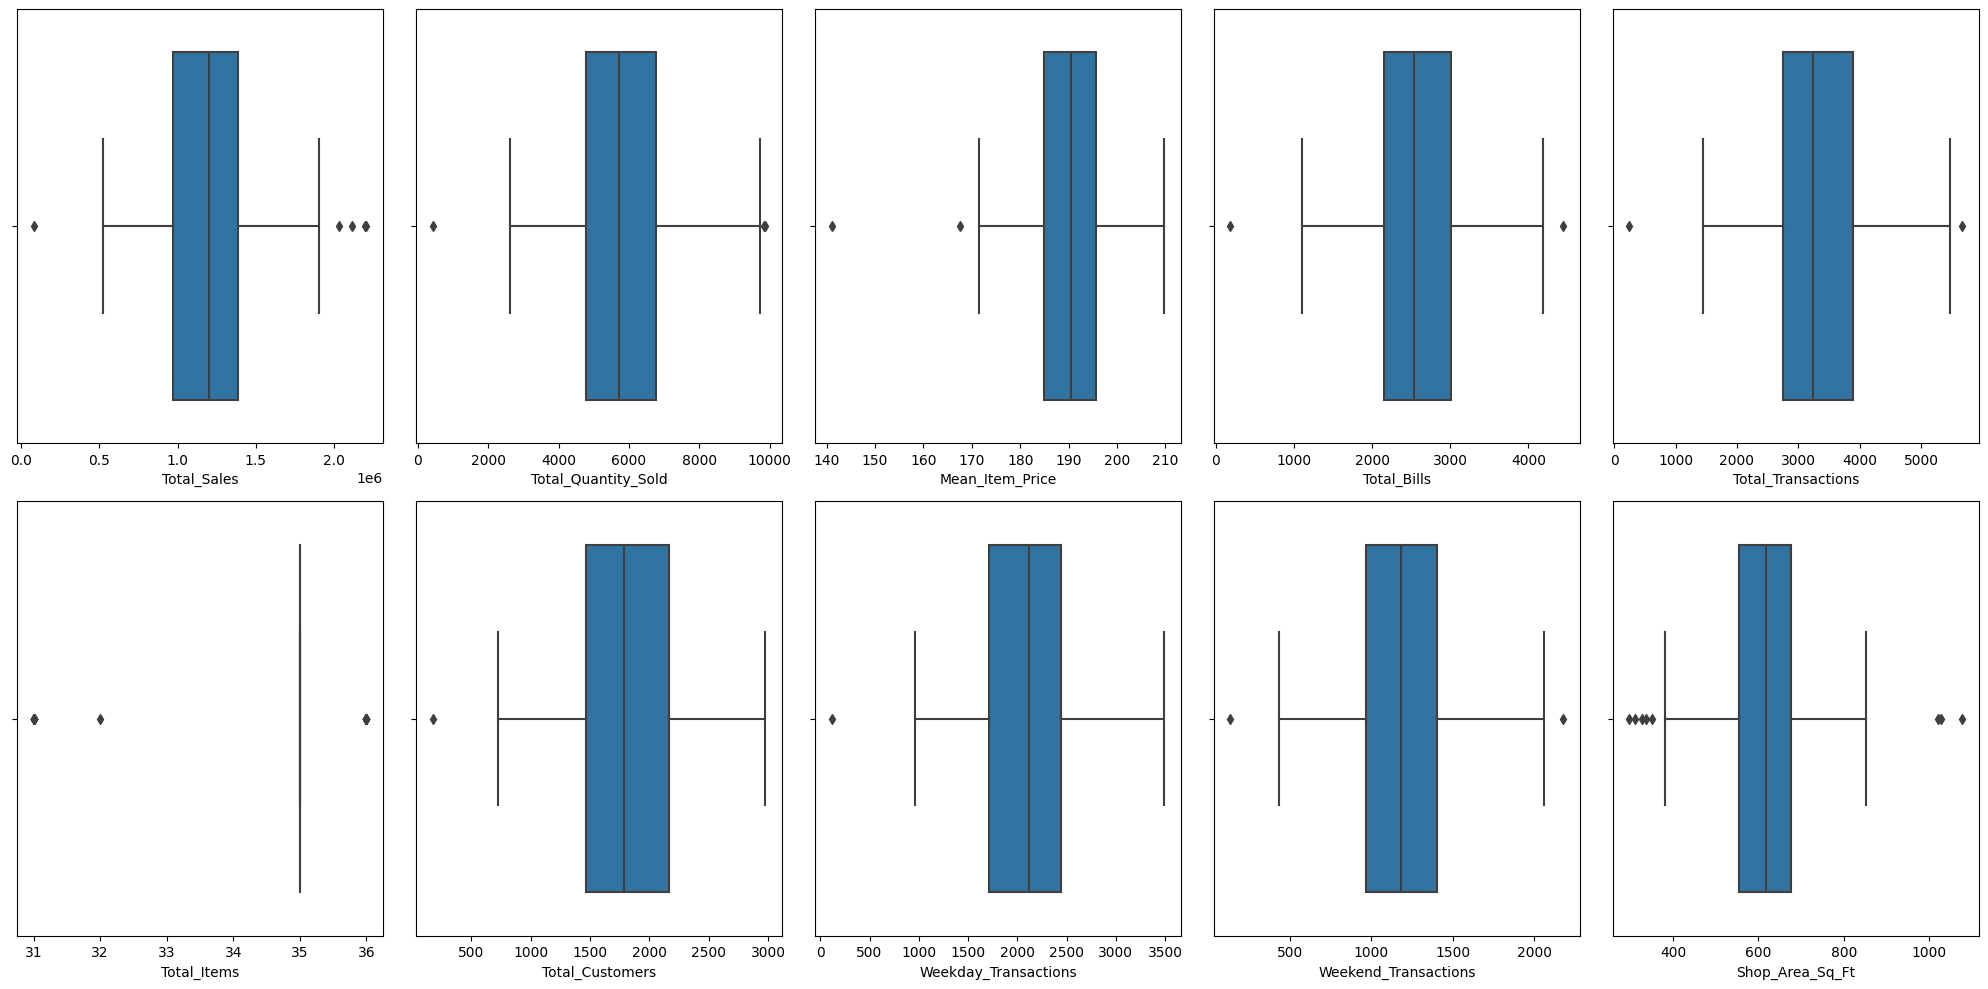

In [70]:
# Create hist plots for each features
fig, axes = plt.subplots(2, 5, figsize=(20, 10))

for i, feature_x in enumerate(feature_cols):
    ix = i//5
    iy = i%5
    sns.boxplot(ax=axes[ix, iy], x=combined_features[feature_x])
    axes[ix, iy].set_xlabel(feature_x.title())

plt.tight_layout()
plt.show()

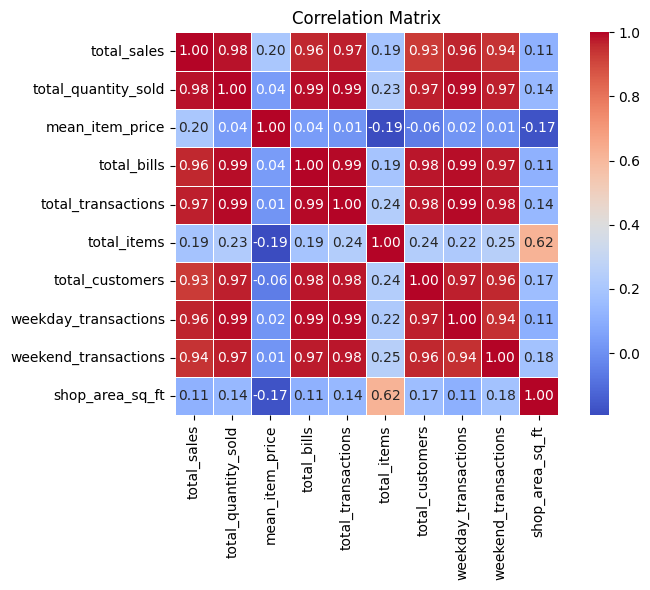

In [71]:
plt.figure(figsize=(8, 6))
corr = combined_features[feature_cols].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, square=True) # type: ignore
plt.title("Correlation Matrix")
plt.tight_layout()
plt.show()

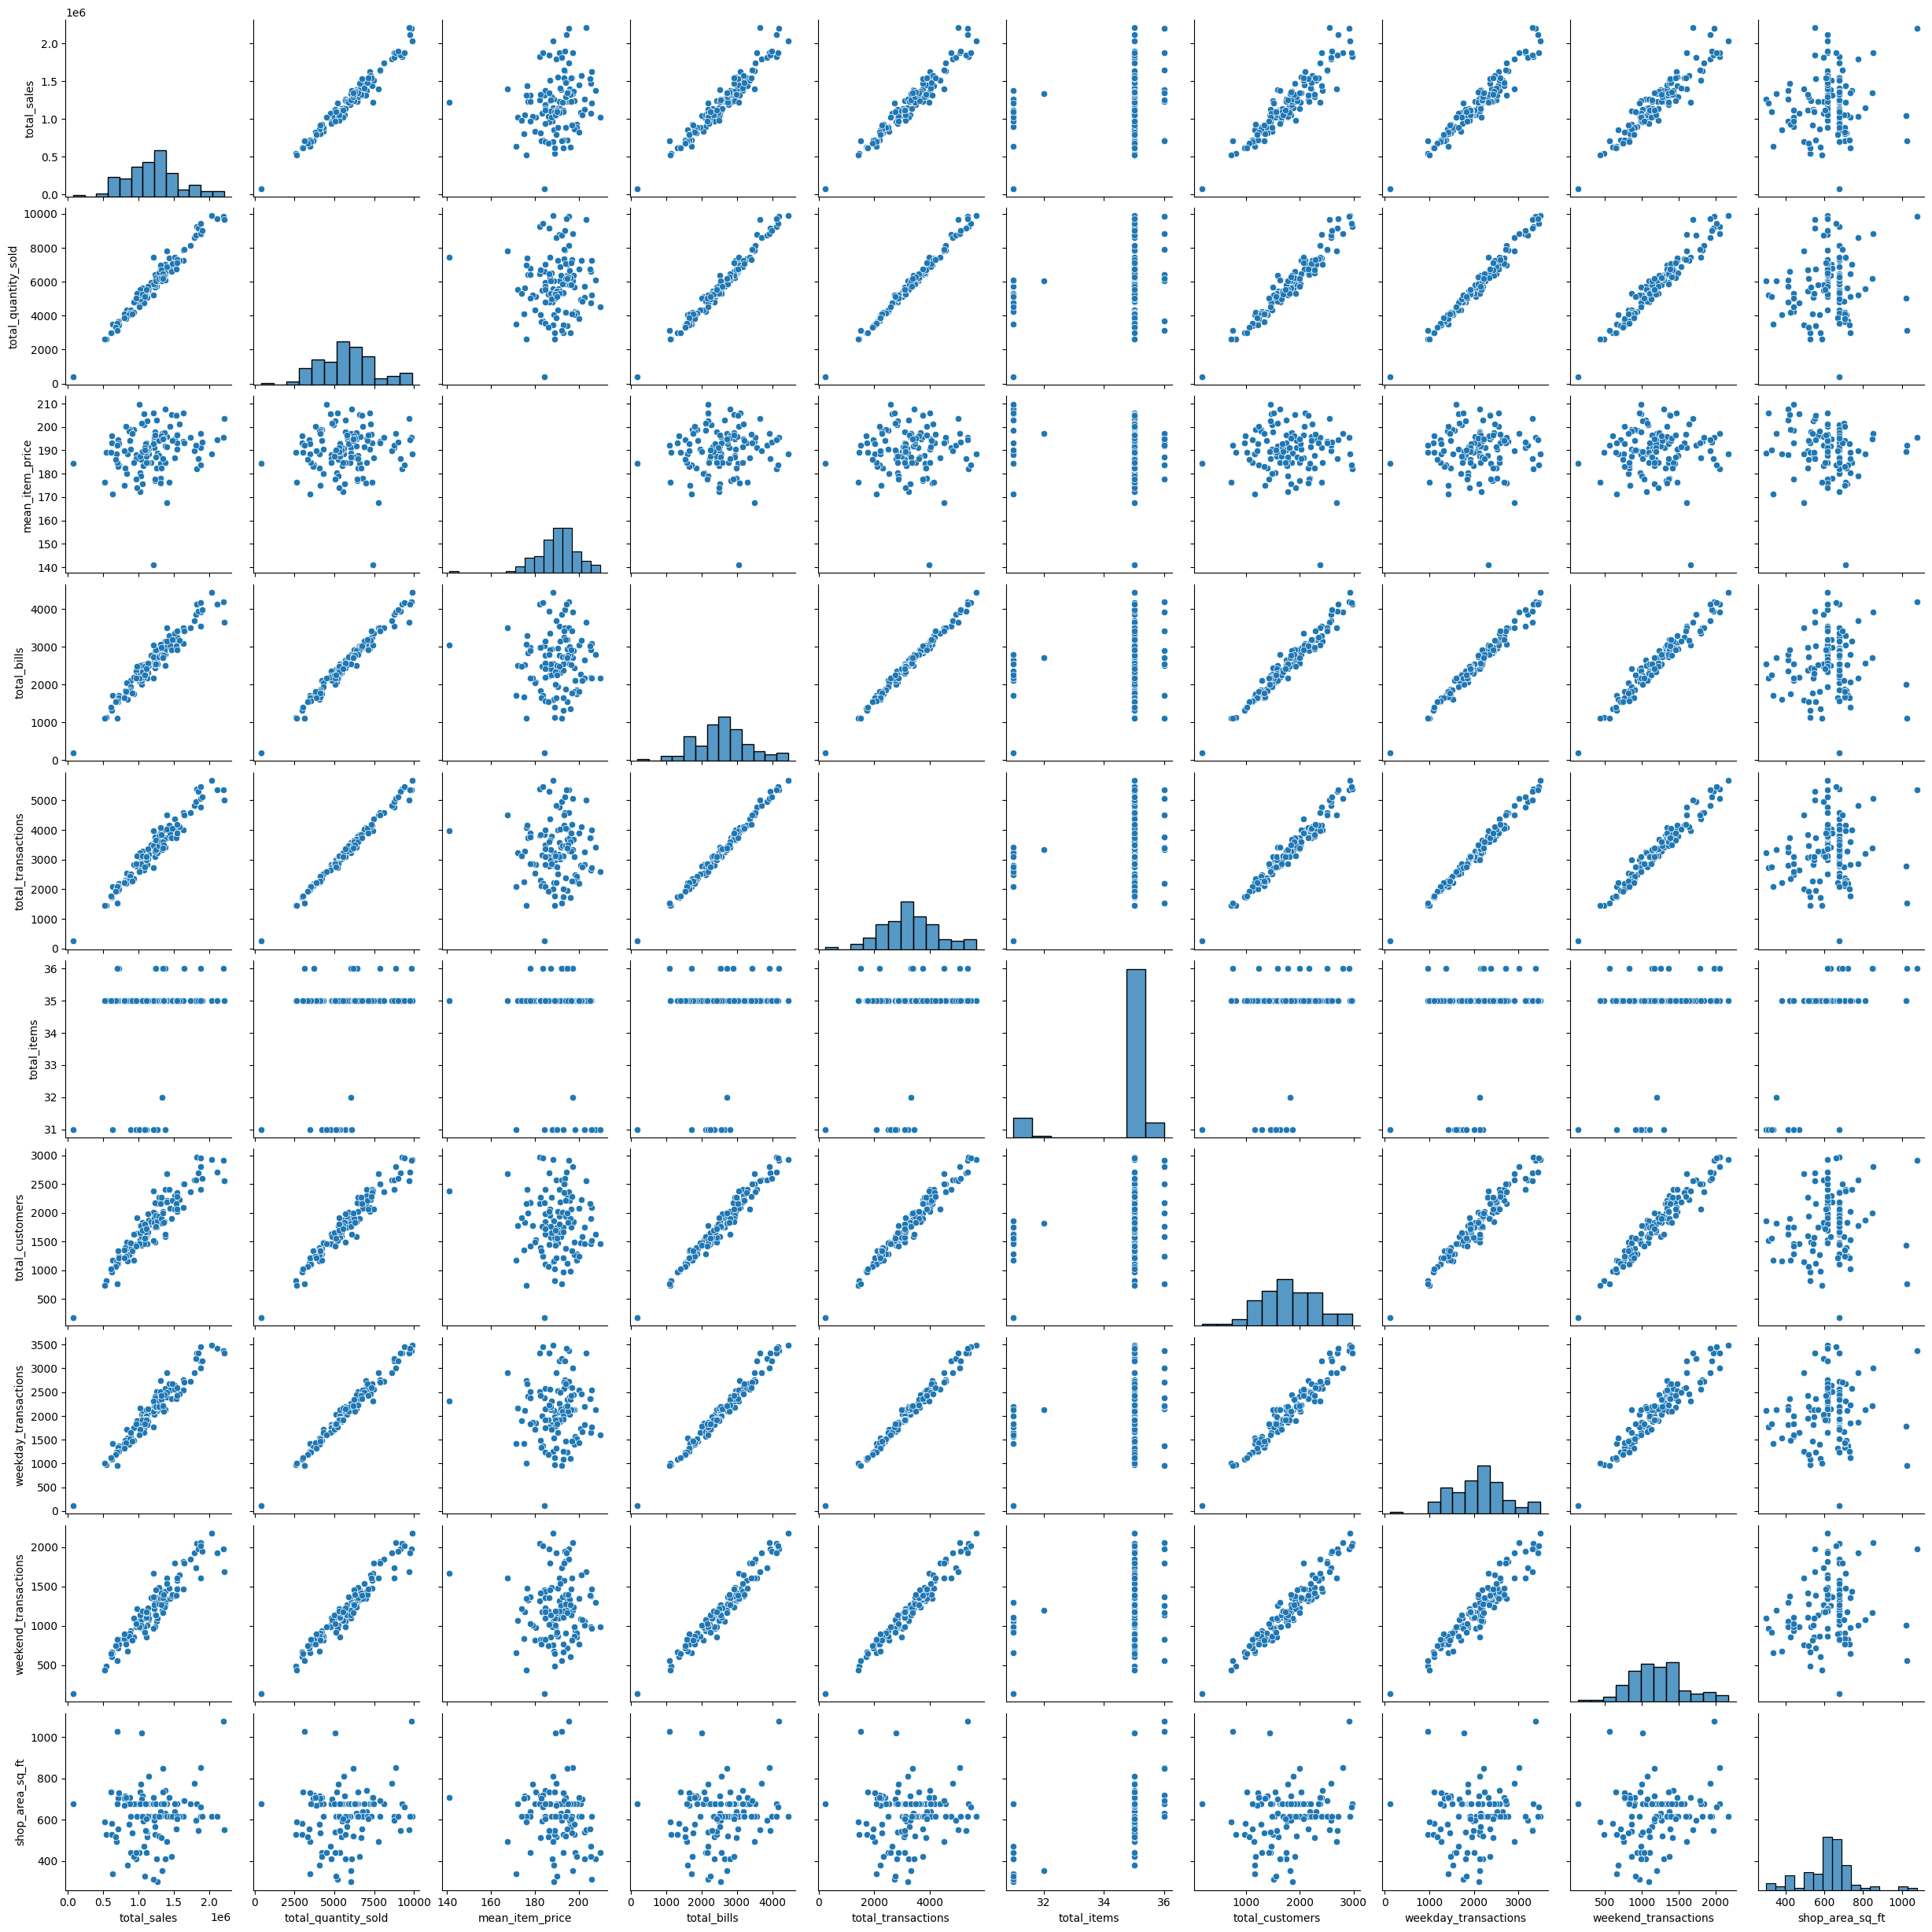

In [72]:
sns.pairplot(combined_features[feature_cols])